# The David De Gea Dilemma: Comparing Goalkeeper Greats Throughout History

In [668]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### June 24th 2023

##### David De Gea is a goalkeeper for Manchester United, where he has been playing as a starter since 2010. With a controversial question mark looming over his contract situation due to his underwhelming 2022-2023 campaign, a portion of the Mancheter United fanbase are debating if De Gea is worthy of being deemed a United legend. 

##### Let's inspect some data and assses how De Gea compares to other goalies who are retired and deemed as legends, not just for United but for other major European clubs, namely:

1. Peter Schmeichel (Manchester United)
2. Edwin van der Sar (Manchester United)
3. Petr Cech (Chelsea)
4. Iker Casillas (Real Madrid)
5. Gianluigi Buffon (Juventus)

alongside these active players who have consistently performed at a high level:

6. Manuel Neuer (Bayern Munich)
7. Alisson Becker (Liverpool)
8. Ederson (Manchester City)
9. Thibaut Courtois (Real Madrid)

and finally with two keepers that have been on United and the fans' radar:

10. Diogo Costa (Porto)
11. Andre Onana (Inter Milan)

In [669]:
gks = ["ps","vds","cech","iker","buffon","neuer","alisson","ederson","courtois","ddg","costa","onana"]
full_name = ["Peter Schmeichel","Edwin Van de Sar","Petr Cech","Iker Casillas","Gianluigi Buffon","Manuel Neuer","Alisson Becker","Ederson","Thibaut Courtois","David De Gea","Diogo Costa","Andre Onana"]

## Penalty Kicks (+ shootouts)

#### Let's first observe how De Gea compares to these keepers regarding penalty kicks.

In [670]:
pk_save_rate = [3/37,11/60,17/85,23/100,39/124,22/76,14/33,7/54,14/66,14/74,11/34,7/33]

**data source**: Transfer Market (e.g. [Onana](https://www.transfermarkt.us/andre-onana/elfmeterstatistik/spieler/234509))

In [671]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Bar(x=gks, y=pk_save_rate,hovertext=full_name)])
# Customize aspect
fig.update_traces(marker_color='rgb(158,202,100)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='Penalty Kick Save Rates among top Keepers (all comps, excluding shootouts)')
fig.show()

##### While **De Gea**'s penalty saving record is not necessarily something he can particulalry be proud of, I, as a United fan, find it quite funny how he was better than both van der Sar and Peter Schmeichel, both United legends.

##### This time, let's try using [KL divergence](https://en.wikipedia.org/wiki/Kullback–Leibler_divergence) to compare this data. KL Divergence, in short, lets us compare two probability distributions by calculating the expectation of the log-odds of two distributions. 

##### Here, let's assume that, based on historical data, players have an 85% chance of scoring and a 15% chance of missing, partly because I couldn't find the consensus on this statistic after going through some data sources. But it seems like the number is somewhere north of 80 percent, so let's go with 85 percent for the sake of brevity of this presentation. (Also, some data sources set aside another percentage for players completely missing the goal, but let's combine that with GK saving the penalty because it is of my opinion that a player missing in any fashion can be attributed to the keeper. It's a mental game!)

##### To that end, our base distribution will be $p_{scored} = .85$ and $p_{saved}=.15$ (the implication being that the average keeper, in the context of PKs, will prevail against the shooter only 15 percent of the time), to which we will compare each goalkeeper's individual penalty kick distribution.

In [672]:
p = [.85,.15]

In [673]:
import numpy as np

def kl_divergence(p, q):
 return np.sum(p[i] * np.log(p[i]/q[i]) for i in range(len(p)))

In [674]:
gks_kld = []

for save_rate in pk_save_rate:
    q = [1-save_rate, save_rate]
    gks_kld.append(kl_divergence(p,q))

fig1= go.Figure(data=[go.Bar(x=gks, y=gks_kld,hovertext=full_name)])
# Customize aspect
fig1.update_traces(marker_color='rgb(158,202,100)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig1.update_layout(title_text='KL Divergence among top Keepers (entire career in all comps, excluding shootouts)')
fig1.show()

/var/folders/75/hf538pcj7917_ym2sh21yfw00000gn/T/ipykernel_24857/194261871.py:4: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.



#### Two identical distributions produces a KL divergnece of 0, and thus the more similar two distributions are, the closer the KL divergence will be to 0. Thus, we can infer that:

1. The likes of Edwin van de Sar, Petr Cech, Ederson, and **De Gea** are pretty much average PK savers.
2. Peter Schmeichel having a higher KL divergence doesn't imply that he's better than the previous mentioned keepers, but that he's **worse** than the average keeper at saving penalty kicks (and we can infer this from the previous visualization where we saw his 8 percent PK save rate, lowest of the 10 keepers here)
3. Buffon, Costa, and Neuer are great at saving PKs, but not as great as Alisson!

(The subtle assumption here is that all penalty kicks are equally difficult, regardless of the competition, whether or not the keeper's team is losing or winning at the time their team gave away a penalty, how good of a PK kicker the GK is going against, and etc.)

#### However, this is an analysis based on non-shootout PKs, meaning that it's excluding some historic moments such as:

1. Edwin Van de sar's three penalty saves in the Community Shield (2007) against Chelsea, and the other two in the Champions League Final (2008), also against Chelsea
2. Petr Cech single-handedly securing Chelsea's first Champions League victory against Bayern Munich in 2012 by denying Olic and Schweinsteiger.
3. De Gea going zero for 11 (0/11) against Villareal in the Europa League final shootout (2021/2022).
4. Neuer denying Kaka and Ronaldo, and with the help of Ramos sending it to the moon, beating Real Madrid in the Champions League (2011/2012)

### (I'm having a hard time finding public data regarding shootouts, so I will expand on this as I manually collect relevant data on my own)

## Now let's compare look into more advanced stats that may tell us more about where De Gea stands amonst other great players.

##### I will be looking into:

1. **Crosses_stp%**: Percentage of crosses stopped
2. **Post Shot xG (PSxG) Prevention per 90**: PSxG is the goals an average keeper is expected to concede, differentiated by the quality of the shot taken by the shooter. Thus, by subtracting the actual number of goals conceded, we can guage how well a keeper does compared to the average keeper when it comes to shot-stopping.
3. **Defensive Actions Outside of Penalty Area per 90 minutes (#OPA/90)**
4. **Average Distance (AvgDist)**: Average distance covered when perfoming all defensive actions away from goal i.e. sweeping                         

with **passing stats** of the following:

5. Passes between 15 ~ 30 yards
6. Passes longer than 30 yards
7. Passes longer than 40 yards

**data source**: Fbref (e.g. [link](https://fbref.com/en/players/7ba6d84e/David-de-Gea))
note that these stats are available only for current, non-retired players; so Peter Schmeichel, van der Sar, Cech, Casillas, and Buffon will not be taken into consideration for this part of analysis

In [675]:
categories = ["Crosses_stp%","PSxG Prevention per 90","OPA/90","AvgDist","pass (15~30 yards)","pass (30 yards <)","pass (40 yards <)"]

In [676]:
adv_stats = pd.DataFrame(np.array([[3.2,.05,2.93,23.3,98.4,66.3,48.3], [4.8,.12,2.28,18.7,98.5,61.6,44.3],[6.5,0,1.5,17.9,98.6,61.1,43.6],[6,.09,.96,14.8,98.9,50.7,32.6],[2.1,.04,.71,14.3,97.8,45.3,36.6],[7.4,.09,1.22,16.6,98.7,53.6,40.9],
                                   [6.4,0.06,1.21,16.2,98.4,54.7,41.3]]),
                   columns=categories,index=full_name[5:])

In [677]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for col in adv_stats.columns:
    adv_stats[[col]] = scaler.fit_transform(adv_stats[[col]])

In [678]:
adv_stats

,Crosses_stp%,PSxG Prevention per 90,OPA/90,AvgDist,pass (15~30 yards),pass (30 yards <),pass (40 yards <)
Manuel Neuer,0.207547,0.416667,1.000000,1.000000,0.545455,1.000000,1.000000
Alisson Becker,0.509434,1.000000,0.707207,0.488889,0.636364,0.776190,0.745223
Ederson,0.830189,0.000000,0.355856,0.400000,0.727273,0.752381,0.700637
Thibaut Courtois,0.735849,0.750000,0.112613,0.055556,1.000000,0.257143,0.000000
David De Gea,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.254777
Diogo Costa,1.000000,0.750000,0.229730,0.255556,0.818182,0.395238,0.528662
Andre Onana,0.811321,0.500000,0.225225,0.211111,0.545455,0.447619,0.554140


In [679]:
fig2 = go.Figure()

fig2.add_trace(go.Scatterpolar(
      r=adv_stats.loc['Manuel Neuer'].values,
      theta=categories,
      fill='toself',
      name='Manuel Neuer',
     marker_line_width=1.5,
    hovertext ='Manuel Neuer'
))
fig2.add_trace(go.Scatterpolar(
      r=adv_stats.loc['Alisson Becker'].values,
      theta=categories,
      fill='toself',
      name='Alisson Becker',
     marker_line_width=.15,
    hovertext='Alisson Becker'
))
fig2.add_trace(go.Scatterpolar(
      r=adv_stats.loc['Ederson'].values,
      theta=categories,
      fill='toself',
      name='Ederson',
     marker_line_width=1.5,
    hovertext = 'Ederson'
))
fig2.add_trace(go.Scatterpolar(
      r=adv_stats.loc['Thibaut Courtois'].values,
      theta=categories,
      fill='toself',
      name='Thibaut Courtois',
     marker_line_width=1.5,
      hovertext='Thibaut Courtois'
    
))
fig2.add_trace(go.Scatterpolar(
      r=adv_stats.loc['Diogo Costa'].values,
      theta=categories,
      fill='toself',
      name='Diogo Costa',
     marker_line_width=1.5,
      hovertext='Diogo Costa'
    
))
fig2.add_trace(go.Scatterpolar(
      r=adv_stats.loc['Andre Onana'].values,
      theta=categories,
      fill='toself',
      name='Andre Onana',
     marker_line_width=1.5,
      hovertext='Andre Onana'
    
))

fig2.add_trace(go.Scatterpolar(
      r=adv_stats.loc['David De Gea'].values,
      theta=categories,
      fill='toself',
      name='David De Gea',
     marker_line_width=1.5,
      hovertext='David De Gea'
    
))

fig2.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=False
    )),
  showlegend=True
)

fig2.update_layout(title_text='Comparison of (Normalized) Advanced Stats among Modern Keepers in their respective domestic leagues (2017~)',height=600)

fig2.show()

### We can see that De Gea is lacking in many areas, coming in dead last for most of these stats barring _PSxG Prevention per 90_ and _pass (40 yards <)_.

### Now let's look at the 2022-2023 season across Big 5 European Leagues

In [680]:
df2223 = pd.read_html('https://fbref.com/en/comps/Big5/keepersadv/players/Big-5-European-Leagues-Stats')

In [681]:
df = df2223[0]

In [682]:
# df.columns = [str(i) for i in range(35)]

In [683]:
cols = df.columns

In [684]:
df = df[[cols[1],cols[17],cols[20],cols[29],cols[32],cols[33]]]

In [685]:
df.head()

Unnamed: 1_level_0 Expected Launched Crosses Sweeper        
               Player      /90     Cmp%     Stp #OPA/90 AvgDist
0       Álvaro Aceves    +0.90     50.0       0   13.85    33.0
1  Julen Agirrezabala    -0.06     36.6      11    1.33    15.4
2       Doğan Alemdar    -0.32     34.3       5    1.11    14.8
3             Alisson    +0.27     41.0      23    2.41    19.8
4     Alphonse Areola    +0.09     37.8       2    0.29    10.3

In [686]:
df.isna().sum()

Unnamed: 1_level_0  Player     0
Expected            /90        2
Launched            Cmp%       4
Crosses             Stp        2
Sweeper             #OPA/90    2
                    AvgDist    7
dtype: int64

In [687]:
df = df.dropna()

In [688]:
df.isna().sum()

Unnamed: 1_level_0  Player     0
Expected            /90        0
Launched            Cmp%       0
Crosses             Stp        0
Sweeper             #OPA/90    0
                    AvgDist    0
dtype: int64

In [689]:
df.columns = ['player','PSx90PrevPer90','40+_completion_%','cross_stop_%',"sweeper_action_90","sweep_avg_dist"]
df.head()

,player,PSx90PrevPer90,40+_completion_%,cross_stop_%,sweeper_action_90,sweep_avg_dist
0,Álvaro Aceves,+0.90,50.0,0,13.85,33.0
1,Julen Agirrezabala,-0.06,36.6,11,1.33,15.4
2,Doğan Alemdar,-0.32,34.3,5,1.11,14.8
3,Alisson,+0.27,41.0,23,2.41,19.8
4,Alphonse Areola,+0.09,37.8,2,0.29,10.3


In [690]:
df = df[~df['PSx90PrevPer90'].isin(['/90'])]

In [691]:
df[['PSx90PrevPer90','40+_completion_%', 'cross_stop_%',
       'sweeper_action_90', 'sweep_avg_dist']] = df[['PSx90PrevPer90','40+_completion_%', 'cross_stop_%',
       'sweeper_action_90', 'sweep_avg_dist']].apply(pd.to_numeric)

In [692]:
df.head(195)

,player,PSx90PrevPer90,40+_completion_%,cross_stop_%,sweeper_action_90,sweep_avg_dist
0,Álvaro Aceves,0.90,50.0,0,13.85,33.0
1,Julen Agirrezabala,-0.06,36.6,11,1.33,15.4
2,Doğan Alemdar,-0.32,34.3,5,1.11,14.8
3,Alisson,0.27,41.0,23,2.41,19.8
4,Alphonse Areola,0.09,37.8,2,0.29,10.3
...,...,...,...,...,...,...
205,Sven Ulreich,0.13,34.6,2,1.33,17.5
206,Guglielmo Vicario,0.09,30.3,34,0.71,11.5
208,Iván Villar,-0.09,33.9,8,0.74,14.2
209,Danny Ward,-0.21,31.0,20,1.62,15.9


In [693]:
from sklearn.decomposition import PCA

In [694]:
features = ['PSx90PrevPer90','40+_completion_%', 'cross_stop_%',
       'sweeper_action_90', 'sweep_avg_dist']
X = df[features]

In [695]:
names = df['player'].values

In [696]:
from sklearn.cluster import KMeans

max_clusters = 20
ks = range(2, max_clusters+1)
clusterers = [KMeans(n_clusters=k, n_init=50, random_state=109).fit(X) for k in ks] 

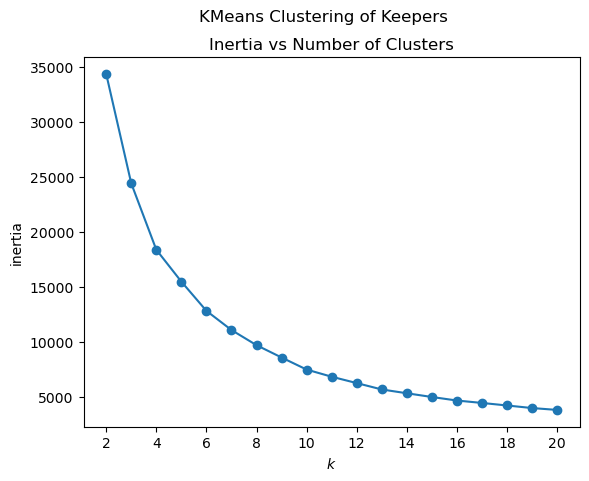

In [697]:
inertias = [c.inertia_ for c in clusterers]
plt.plot(ks, inertias, 'o-')
plt.xticks(ks[::2])
plt.xlabel('$k$')
plt.ylabel('inertia');
plt.suptitle('KMeans Clustering of Keepers')
plt.title('Inertia vs Number of Clusters');

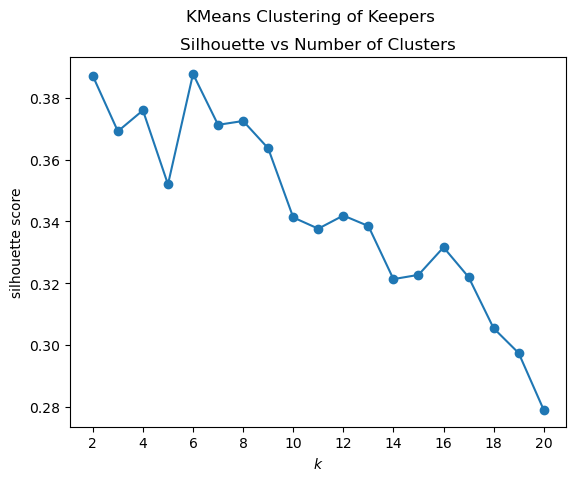

In [698]:
from sklearn.metrics import silhouette_score, silhouette_samples

sil_scores = [silhouette_score(X, c.labels_) for c in clusterers]
plt.plot(ks, sil_scores, 'o-')
plt.xticks(ks[::2])
plt.xlabel('$k$')
plt.ylabel('silhouette score')
plt.suptitle('KMeans Clustering of Keepers')
plt.title('Silhouette vs Number of Clusters');

In [699]:
best_k = 6
kmeans = KMeans(n_clusters=best_k, n_init=50, random_state=109).fit(X.values)
labels = kmeans.labels_

In [700]:
pca = PCA(n_components=2).fit(X)
# project data onto 2D space spanned by components
X_pca = pca.transform(X)
X_pca.shape

(200, 2)

In [701]:
modern_gks =['Alisson','Ederson','David de Gea', 'André Onana','Kepa Arrizabalaga',
             'Mike Maignan','Jordan Pickford','Nick Pope','Jason Steele',
             'Thibaut Courtois','Dean Henderson','Hugo Lloris','Robert Sánchez','Danny Ward',
             'Keylor Navas','Unai Simón','Gianluigi Donnarumma','Jan Oblak','Rui Patrício',
            'Aaron Ramsdale','José Sá','Neto','Illan Meslier','Emiliano Martínez','Bernd Leno','Vicente Guaita',
            'Gavin Bazunu','Łukasz Fabiański','Fraser Forster','Bernd Leno','Alex McCarthy','Daniel Iversen','Mark Travers',
            'Marc-André ter Stegen','Yann Sommer']

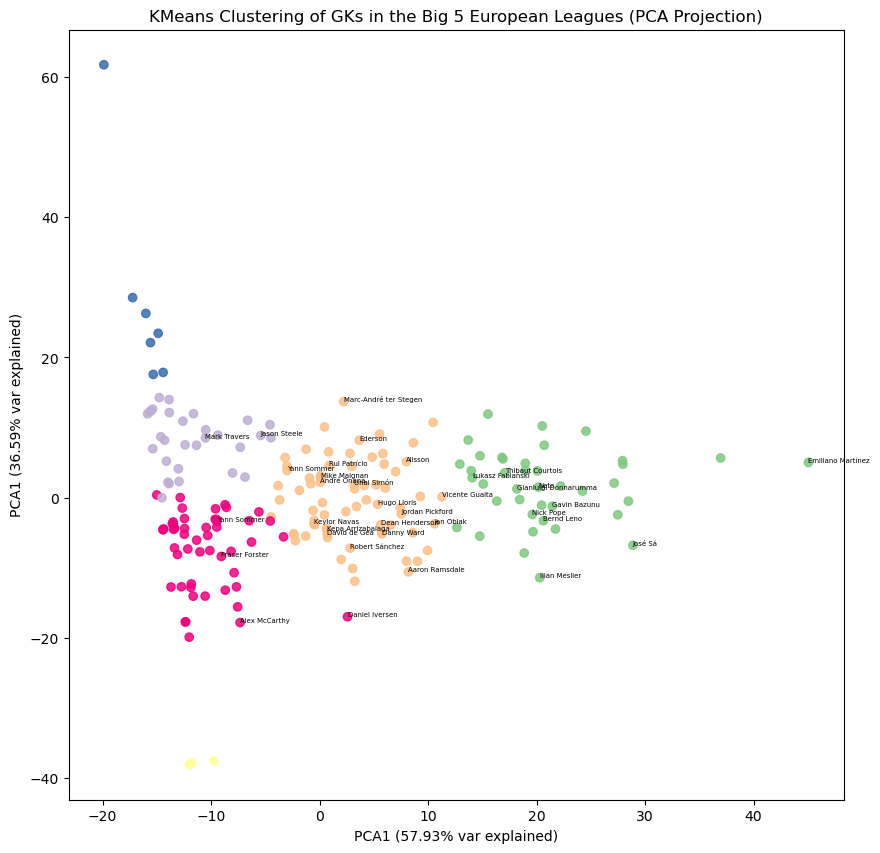

In [702]:
plt.figure(figsize=(10,10))

# data points colored by cluster labels
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=.85,c=plt.cm.Accent(labels))

# annotate animal names for our random subset 
for i in range(X_pca.shape[0]):
    name = names[i]
    if name in modern_gks:
        a = plt.annotate(names[i], (X_pca[i]),size=5)

plt.xlabel(f'PCA1 ({pca.explained_variance_ratio_[0]:.2%} var explained)')
plt.ylabel(f'PCA1 ({pca.explained_variance_ratio_[1]:.2%} var explained)');
plt.title('KMeans Clustering of GKs in the Big 5 European Leagues (PCA Projection)');

### Let's try adding more passing data, namely, completion rate for passes between 15 ~ 30 yards and passes longer than 30 yards and try clustering again.

In [703]:
pass_df = pd.read_html('https://fbref.com/en/comps/Big5/passing/players/Big-5-European-Leagues-Stats')
passdf = pass_df[0]

In [704]:
passdf.columns

MultiIndex([( 'Unnamed: 0_level_0',      'Rk'),
            ( 'Unnamed: 1_level_0',  'Player'),
            ( 'Unnamed: 2_level_0',  'Nation'),
            ( 'Unnamed: 3_level_0',     'Pos'),
            ( 'Unnamed: 4_level_0',   'Squad'),
            ( 'Unnamed: 5_level_0',    'Comp'),
            ( 'Unnamed: 6_level_0',     'Age'),
            ( 'Unnamed: 7_level_0',    'Born'),
            ( 'Unnamed: 8_level_0',     '90s'),
            (              'Total',     'Cmp'),
            (              'Total',     'Att'),
            (              'Total',    'Cmp%'),
            (              'Total', 'TotDist'),
            (              'Total', 'PrgDist'),
            (              'Short',     'Cmp'),
            (              'Short',     'Att'),
            (              'Short',    'Cmp%'),
            (             'Medium',     'Cmp'),
            (             'Medium',     'Att'),
            (             'Medium',    'Cmp%'),
            (               'Long',     

In [705]:
passdf = passdf[[( 'Unnamed: 1_level_0',  'Player'), ('Unnamed: 3_level_0','Pos'),('Medium','Cmp%'),('Long','Cmp%'),('Unnamed: 28_level_0',     '1/3')]]

In [706]:
passdf.head()

,Unnamed: 1_level_0,Unnamed: 3_level_0,Medium,Long,Unnamed: 28_level_0
,Player,Pos,Cmp%,Cmp%,1/3
0,Brenden Aaronson,"MF,FW",76.9,38.5,47
1,Paxten Aaronson,"MF,DF",60.9,16.7,3
2,James Abankwah,DF,75.0,40.0,0
3,George Abbott,MF,NaN,NaN,0
4,Yunis Abdelhamid,DF,90.1,55.6,155


In [707]:
passdf.columns = ['player','pos','med_completion_rate','long_completion_rate','final_third']

In [711]:
passdf = passdf[passdf['pos'] == 'GK']

In [712]:
passdf = passdf.dropna()

In [713]:
passdf[['med_completion_rate',
       'long_completion_rate', 'final_third']] = passdf[['med_completion_rate',
       'long_completion_rate', 'final_third']].apply(pd.to_numeric)

In [714]:
tdf = pd.merge(df, passdf, on="player")

In [715]:
tdf.head()

,player,PSx90PrevPer90,40+_completion_%,cross_stop_%,sweeper_action_90,sweep_avg_dist,pos,med_completion_rate,long_completion_rate,final_third
0,Álvaro Aceves,0.90,50.0,0,13.85,33.0,GK,100.0,50.0,0
1,Julen Agirrezabala,-0.06,36.6,11,1.33,15.4,GK,96.8,43.2,2
2,Doğan Alemdar,-0.32,34.3,5,1.11,14.8,GK,100.0,36.4,2
3,Alisson,0.27,41.0,23,2.41,19.8,GK,98.6,58.2,16
4,Alphonse Areola,0.09,37.8,2,0.29,10.3,GK,100.0,44.2,0


In [716]:
categories = ['PSx90PrevPer90', '40+_completion_%', 'cross_stop_%',
       'sweeper_action_90', 'sweep_avg_dist',
       'med_completion_rate', 'long_completion_rate', 'final_third']

In [717]:
for cat in categories:
    tdf[[cat]] = scaler.fit_transform(tdf[[cat]])

In [718]:
tdf.shape

(211, 10)

In [719]:
tdf.columns

Index(['player', 'PSx90PrevPer90', '40+_completion_%', 'cross_stop_%',
       'sweeper_action_90', 'sweep_avg_dist', 'pos', 'med_completion_rate',
       'long_completion_rate', 'final_third'],
      dtype='object')

In [720]:
total_features = ['PSx90PrevPer90', '40+_completion_%', 'cross_stop_%',
       'sweeper_action_90', 'sweep_avg_dist',
       'med_completion_rate', 'long_completion_rate', 'final_third']

In [721]:
X = tdf[total_features]

clusterers = [KMeans(n_clusters=k, n_init=50, random_state=109).fit(X) for k in ks] 

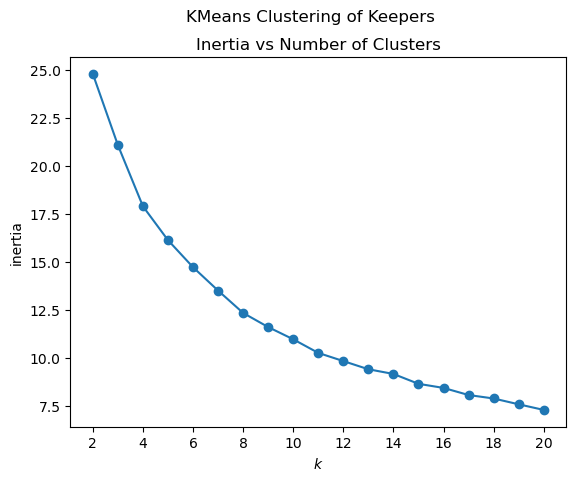

In [722]:
inertias = [c.inertia_ for c in clusterers]
plt.plot(ks, inertias, 'o-')
plt.xticks(ks[::2])
plt.xlabel('$k$')
plt.ylabel('inertia');
plt.suptitle('KMeans Clustering of Keepers')
plt.title('Inertia vs Number of Clusters');

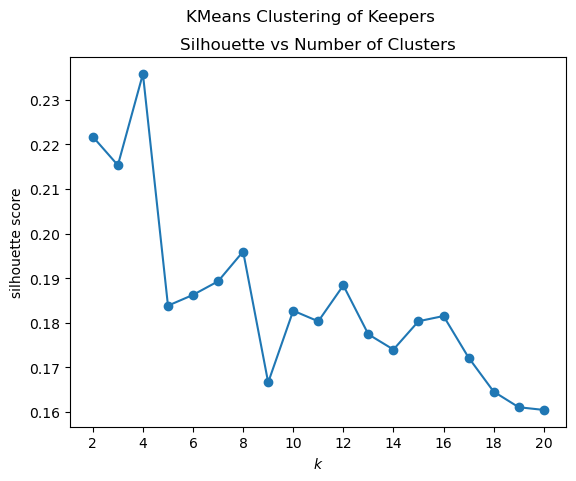

In [723]:
sil_scores = [silhouette_score(X, c.labels_) for c in clusterers]
plt.plot(ks, sil_scores, 'o-')
plt.xticks(ks[::2])
plt.xlabel('$k$')
plt.ylabel('silhouette score')
plt.suptitle('KMeans Clustering of Keepers')
plt.title('Silhouette vs Number of Clusters');

In [724]:
best_k = 4
kmeans = KMeans(n_clusters=best_k, n_init=50, random_state=109).fit(X.values)
labels = kmeans.labels_

In [725]:
pca = PCA(n_components=2).fit(X)
# project data onto 2D space spanned by components
X_pca = pca.transform(X)
X_pca.shape

(211, 2)

In [726]:
names = tdf['player'].values

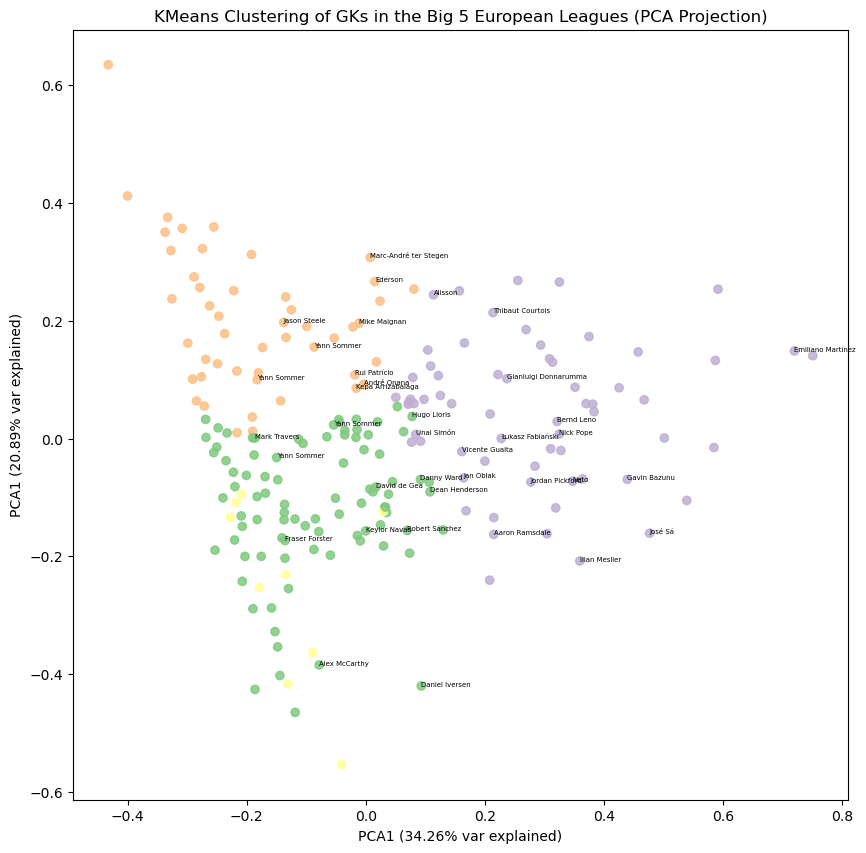

In [727]:
plt.figure(figsize=(10,10))

# data points colored by cluster labels
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=.85,c=plt.cm.Accent(labels))

# annotate animal names for our random subset 
for i in range(X_pca.shape[0]):
    name = names[i]
    if name in modern_gks:
        a = plt.annotate(names[i], (X_pca[i]),size=5)

plt.xlabel(f'PCA1 ({pca.explained_variance_ratio_[0]:.2%} var explained)')
plt.ylabel(f'PCA1 ({pca.explained_variance_ratio_[1]:.2%} var explained)');
plt.title('KMeans Clustering of GKs in the Big 5 European Leagues (PCA Projection)');

#### With the passing data included, I'm not sure how I feel about De Gea's company! Takeaways:

1. Dean Henderson might not be the upgrade on De Gea as some people might think he could be, based on this analysis. He doesn't necessarily bring a different type of a playing style, either.
2. Again, based on this clustering scheme, this gives some idea as to how different De Gea's profile might be compared to those of Alisson, Ederson, Onana, Unai Simon, and other more proactive keepers.
3. Many goalkeepers that play for top teams seem to have their goalkeepers in the orange and purple groups, and not the one De Gea belongs to

## A look inside the cluster groups

In [729]:
tdf['group'] = labels

In [730]:
tdf.describe()

,PSx90PrevPer90,40+_completion_%,cross_stop_%,sweeper_action_90,sweep_avg_dist,med_completion_rate,long_completion_rate,final_third,group
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,0.571263,0.367934,0.240916,0.082701,0.362921,0.855318,0.463349,0.083810,0.886256
std,0.108922,0.098860,0.212787,0.079110,0.123928,0.154749,0.162267,0.122601,0.903090
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.530997,0.317500,0.041667,0.049458,0.298305,0.800000,0.350833,0.007353,0.000000
50%,0.582210,0.359000,0.216667,0.072202,0.362712,0.880000,0.456667,0.044118,1.000000
75%,0.618598,0.412500,0.366667,0.102527,0.430508,0.944000,0.555833,0.117647,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [731]:
group1 = tdf[tdf['group']==0]
group2 = tdf[tdf['group']==1]
group3 = tdf[tdf['group']==2]
group4 = tdf[tdf['group']==3]

In [732]:
df1 =group1.describe()
df2 =group2.describe()
df3 =group3.describe()
df4 =group4.describe()

In [733]:
df1.head(8)

,PSx90PrevPer90,40+_completion_%,cross_stop_%,sweeper_action_90,sweep_avg_dist,med_completion_rate,long_completion_rate,final_third,group
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.0
mean,0.567355,0.317756,0.142407,0.069226,0.327985,0.898311,0.375870,0.041748,0.0
std,0.119779,0.076589,0.109794,0.048834,0.100512,0.093820,0.111326,0.045405,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.640000,0.000000,0.000000,0.0
25%,0.528302,0.296250,0.033333,0.041155,0.274576,0.840000,0.316667,0.007353,0.0
50%,0.578167,0.330000,0.108333,0.066426,0.342373,0.908000,0.379167,0.029412,0.0
75%,0.623989,0.351000,0.233333,0.090794,0.389831,1.000000,0.462500,0.056985,0.0
max,1.000000,0.467000,0.383333,0.361011,0.603390,1.000000,0.575000,0.235294,0.0


In [734]:
tdf[tdf['player']=='David de Gea']

,player,PSx90PrevPer90,40+_completion_%,cross_stop_%,sweeper_action_90,sweep_avg_dist,pos,med_completion_rate,long_completion_rate,final_third,group
60,David de Gea,0.584906,0.314,0.25,0.06065,0.383051,GK,0.84,0.393333,0.051471,0


## De Gea is in Group 1; let's see how their group compared to the others

In [735]:
fig4 = go.Figure()

categoris = df1.columns

fig4.add_trace(go.Scatterpolar(
      r=df1.loc['mean'].values,
      theta=categories,
      fill='toself',
      name='Group 1',
     marker_line_width=1.5,
    hovertext ='Group 1'
))
fig4.add_trace(go.Scatterpolar(
      r=df2.loc['mean'].values,
      theta=categories,
      # fill='toself',
      name='Group 2',
     marker_line_width=.15,
    hovertext='Group 2'
))
fig4.add_trace(go.Scatterpolar(
      r=df3.loc['mean'].values,
      theta=categories,
      # fill='toself',
      name='Group 3',
     marker_line_width=1.5,
    hovertext = 'Group 3'
))
fig4.add_trace(go.Scatterpolar(
      r=df4.loc['mean'].values,
      theta=categories,
      # fill='toself',
      name='Group 4',
     marker_line_width=1.5,
    hovertext = 'Group 4'
))


fig4.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=False
    )),
  showlegend=True
)

fig4.update_layout(title_text='Comparison of (Normalized) Average of Advanced Stats among Profile Groups in their respective domestic leagues (2017~)',height=600)

fig4.show()

In [736]:
fig4 = go.Figure()

categoris = df1.columns

fig4.add_trace(go.Scatterpolar(
      r=df1.loc['50%'].values,
      theta=categories,
      fill='toself',
      name='Group 1',
     marker_line_width=1.5,
    hovertext ='Group 1'
))
fig4.add_trace(go.Scatterpolar(
      r=df2.loc['50%'].values,
      theta=categories,
      # fill='toself',
      name='Group 2',
     marker_line_width=.15,
    hovertext='Group 2'
))
fig4.add_trace(go.Scatterpolar(
      r=df3.loc['50%'].values,
      theta=categories,
      # fill='toself',
      name='Group 3',
     marker_line_width=1.5,
    hovertext = 'Group 3'
))
fig4.add_trace(go.Scatterpolar(
      r=df4.loc['50%'].values,
      theta=categories,
      # fill='toself',
      name='Group 4',
     marker_line_width=1.5,
    hovertext = 'Group 4'
))


fig4.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=False
    )),
  showlegend=True
)

fig4.update_layout(title_text='Comparison of (Normalized) Median of Advanced Stats among Modern Keepers in their respective domestic leagues (2017~)',height=600)

fig4.show()